In [1]:
import pandas as pd

In [2]:
train_df = pd.read_excel('/Users/pranavgajera/Downloads/DLNLP/Assignment1/Dataset/ClassificationDataset-train0.xlsx')
train_df

neutral  \
0     positive   
1      neutral   
2      neutral   
3     positive   
4     positive   
...        ...   
2792   neutral   
2793   neutral   
2794   neutral   
2795   neutral   
2796   neutral   

     According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0     The company booked April-June new orders worth...                                                                               
1     Lemminkainen Infra Oy 's subsidiary Lemminkain...                                                                               
2     GUANGDONG , October 26 , SinoCast -- Nokia Tel...                                                                               
3     According to Kesko , the company agreed with t...                                                                               
4     New product launches in Finland will more than...                                                                               
...                                                 ...                                                                               
2792  It posted a turnover of 4.5 mln euro $ 6.1 mln...                                                                               
2793  The group posted net sales of 35.3 mln euro $ ...                                                                               
2794  The contract value amounts to about EUR11m , t...                                                                               
2795  Country : ; Germany Sector : Construction-Real...                                                                               
2796  cents Recognize potential partnerships and sup...                                                                               

[2797 rows x 2 columns]

In [3]:
train_df.iloc[:,0].value_counts()

neutral     1810
positive     900
negative      87
Name: neutral, dtype: int64

In [4]:
import numpy as np

words = dict()

def add_to_dict(d,filename):
    with open(filename,'r') as f:
        for line in f.readlines():
            line = line.split(' ')
            
            try:
                d[line[0]] = np.array(line[1:],dtype=float)
            except:
                continue

In [5]:
add_to_dict(words,'./glove/glove.6B/glove.6B.300d.txt')
words

{'the': array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
         2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
        -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
         2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
        -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
        -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
         9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
        -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
         1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
         2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
         1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
         2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
        -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
        -4.4640e-01,  1.7197e-01,  4.6246e-0

In [6]:
len(words)

400000

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pranavgajera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenizer.tokenize('Hello there! how are you?@ not as it is,')

['Hello', 'there', 'how', 'are', 'you', 'not', 'as', 'it', 'is']

In [9]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('feet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pranavgajera/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'foot'

In [10]:
def message_to_token_list(s):
    tokens = tokenizer.tokenize(s)
    lowercase_tokens = [t.lower() for t in tokens]
    lemmatize_tokens = [lemmatizer.lemmatize(t) for t in lowercase_tokens]
    useful_tokens = [t for t in lemmatize_tokens if t in words]
    
    return useful_tokens

In [11]:
message_to_token_list('Hello there! how are you feet muted ran?@ not as it is,')

['hello',
 'there',
 'how',
 'are',
 'you',
 'foot',
 'muted',
 'ran',
 'not',
 'a',
 'it',
 'is']

In [12]:
def message_to_word_vectors(message,word_dict=words):
    processed_list_of_tokens = message_to_token_list(message)
    vectors = []
    
    for token in processed_list_of_tokens:
        if token not in word_dict:
            continue
        
        token_vector = word_dict[token]
        vectors.append(token_vector)
        
    return np.array(vectors,dtype=float)

In [13]:
message_to_word_vectors('Hello there! how are you feet muted ran?@ not as it is,')

array([[-0.33712  , -0.21691  , -0.0066365, ...,  0.40558  ,  0.18073  ,
         0.6425   ],
       [-0.47618  ,  0.069478 , -0.013086 , ..., -0.050192 , -0.075908 ,
         0.14856  ],
       [-0.2852   , -0.013883 ,  0.31607  , ..., -0.10859  , -0.14354  ,
         0.1485   ],
       ...,
       [-0.29712  ,  0.094049 , -0.096662 , ...,  0.059717 , -0.22853  ,
         0.29602  ],
       [ 0.033284 , -0.040754 , -0.048377 , ..., -0.15408  ,  0.17806  ,
        -0.19683  ],
       [-0.1749   ,  0.22956  ,  0.24924  , ..., -0.24131  , -0.40402  ,
         0.054744 ]])

In [14]:
train_df = pd.read_excel('/Users/pranavgajera/Downloads/DLNLP/Assignment1/Dataset/ClassificationDataset-train0.xlsx')
val_df = pd.read_excel('/Users/pranavgajera/Downloads/DLNLP/Assignment1/Dataset/ClassificationDataset-valid0.xlsx')
print(train_df.shape)
print(val_df.shape)

(2797, 2)
(1202, 2)


In [34]:
def df_to_X_y(dff):
    y = dff.iloc[:,0]
    y = np.array([-1 if t == 'negative' else 1 if t == 'positive' else 0 for t in y])
    
    all_word_vector_sequences = []
    
    for message in dff.iloc[:,1]:
        message_as_vector_sequence = message_to_word_vectors(message)
        
        if message_as_vector_sequence.shape[0]==0:
            message_as_vector_sequence = np.zeros(shape=(1,300))
            
        all_word_vector_sequences.append(message_as_vector_sequence)
    
    return all_word_vector_sequences,y

In [35]:
X_train, y_train = df_to_X_y(train_df)

In [48]:
len(X_train[2])

26

(array([ 97., 711., 867., 596., 343., 139.,  40.,   3.,   0.,   1.]),
 array([ 1. ,  7.9, 14.8, 21.7, 28.6, 35.5, 42.4, 49.3, 56.2, 63.1, 70. ]),
 <BarContainer object of 10 artists>)

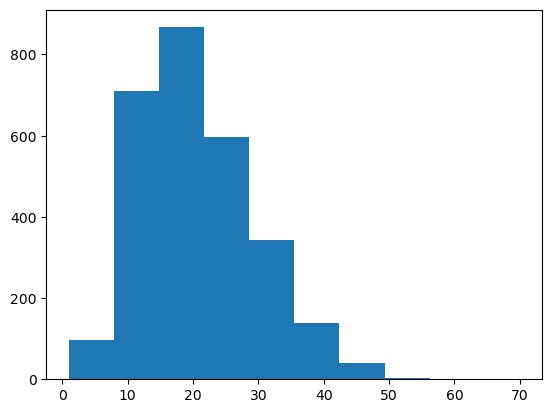

In [49]:
sequence_lengths = []

for i in range(len(X_train)):
    sequence_lengths.append(len(X_train[i]))
    
import matplotlib.pyplot as plt
plt.hist(sequence_lengths)

In [69]:
max_length = int(pd.Series(sequence_lengths).describe().max())

In [ ]:
from copy import deepcopy

def pad_X(X,desired_sequence_length = 100):
    X_copy = deepcopy(X)
    
    for i,x in enumerate(X):
        x_seq_len = x.shape[0]
        sequence_length_diff = desired_sequence_length - x_seq_len
        pad = np.zeros(shape=(sequence_length_diff,300))
        X_copy[i]=np.concatenate([x,pad])
        
    return np.array(X_copy).astype(float)

In [ ]:
X_train = pad_X(X_train,max_length)
X_train.shape